In [1]:
import numpy as np
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.simplefilter('ignore')
import logging
logging.basicConfig()
logger = logging.getLogger()
logger.setLevel(logging.INFO)

from banditpylib.arms import BernoulliArm
from banditpylib.bandits import OrdinaryBandit
from banditpylib.protocols import SinglePlayerProtocol, trial_data_messages_to_dict
from banditpylib.learners.ordinary_fbbai_learner import Uniform, SR, SH

In [2]:
budget = 1000
means = np.random.uniform(0, 1, 50)
arms = [BernoulliArm(mean) for mean in means]
bandit = OrdinaryBandit(arms=arms, name='Ordinary MAB')
learners = [Uniform(arm_num=len(arms), budget=budget, name='Uniform Sampling'), 
            SR(arm_num=len(arms), budget=budget, name='Successive Rejects'),
            SH(arm_num=len(arms), budget=budget, name='Sequential Halving')]
# for each setup we run 500 trials
trials = 500
temp_file = tempfile.NamedTemporaryFile()

In [3]:
# simulator
game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# start playing the game
# add `debug=True` for debugging purpose
game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:start Uniform Sampling's play with Ordinary MAB
INFO:absl:Uniform Sampling's play with Ordinary MAB runs 0.58 seconds.
INFO:absl:start Successive Rejects's play with Ordinary MAB
INFO:absl:Successive Rejects's play with Ordinary MAB runs 3.24 seconds.
INFO:absl:start Sequential Halving's play with Ordinary MAB
INFO:absl:Sequential Halving's play with Ordinary MAB runs 0.77 seconds.


In [4]:
data_df = trial_data_messages_to_dict(temp_file.name)

In [5]:
data_df.head()

,bandit,learner,rounds,total_actions,regret
0,Ordinary MAB,Uniform Sampling,1,1000,0.0
1,Ordinary MAB,Uniform Sampling,1,1000,0.0
2,Ordinary MAB,Uniform Sampling,1,1000,1.0
3,Ordinary MAB,Uniform Sampling,1,1000,1.0
4,Ordinary MAB,Uniform Sampling,1,1000,0.0


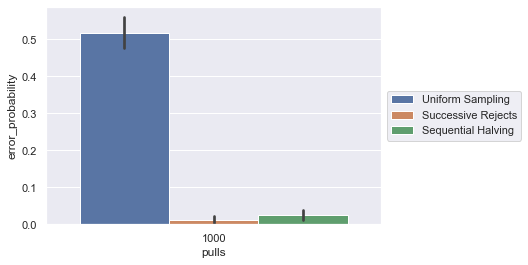

In [6]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='total_actions', y='regret', hue='learner', data=data_df)
plt.xlabel('pulls')
plt.ylabel('error_probability')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

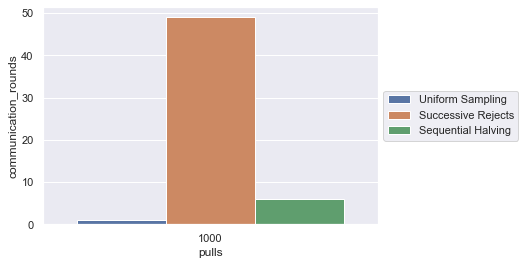

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='total_actions', y='rounds', hue='learner', data=data_df)
plt.xlabel('pulls')
plt.ylabel('communication_rounds')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))